# Laborator 5

# Programare GeneticƒÉ cu DEAP

## 1. Introducere

**Ce este Programarea GeneticƒÉ?**

[Programarea GeneticƒÉ (Genetic Programming - GP)](https://en.wikipedia.org/wiki/Genetic_programming) este o tehnicƒÉ de calcul evolutiv, inspiratƒÉ de teoria selec»õiei naturale a lui Darwin, specializatƒÉ √Æn descoperirea automatƒÉ a programelor de calculator care rezolvƒÉ (sau aproximeazƒÉ rezolvarea) unei sarcini specifice. Spre deosebire de al»õi algoritmi genetici care optimizeazƒÉ de obicei un set de parametri (reprezenta»õi ca »ôiruri de bi»õi, vectori de numere reale etc.), GP manipuleazƒÉ direct structuri arborescente care reprezintƒÉ programe sau expresii.

**Scurt context istoric:**

De»ôi idei similare au existat anterior, Programarea GeneticƒÉ a fost popularizatƒÉ »ôi formalizatƒÉ √Æn principal de [John Koza](https://en.wikipedia.org/wiki/John_Koza) √Æn anii '90, pornind de la lucrƒÉrile sale despre evolu»õia programelor LISP. GP a demonstrat capacitatea de a genera solu»õii competitive cu cele umane pentru o varietate de probleme.

**Principii de bazƒÉ:**

GP urmeazƒÉ ciclul evolutiv standard:
1.  **Ini»õializare:** Se genereazƒÉ o popula»õie ini»õialƒÉ de programe/expresii aleatoare.
2.  **Evaluare (Fitness):** Fiecare program din popula»õie este executat »ôi performan»õa sa este evaluatƒÉ folosind o func»õie de fitness. Aceasta mƒÉsoarƒÉ c√¢t de bine rezolvƒÉ programul problema datƒÉ.
3.  **Selec»õie:** Programele cu fitness mai bun au o probabilitate mai mare de a fi selectate pentru reproducere.
4.  **Operatori genetici:** Programele selectate sunt supuse unor operatori genetici (precum √Æncruci»ôarea »ôi muta»õia) pentru a crea o nouƒÉ genera»õie de programe.
5.  **Itera»õie:** Pa»ôii 2-4 se repetƒÉ pentru un numƒÉr de genera»õii sau p√¢nƒÉ c√¢nd se atinge un criteriu de oprire (de ex., o solu»õie suficient de bunƒÉ).

**Diferen»õe fa»õƒÉ de alte abordƒÉri (evolutive):**

*   **Algoritmi Genetici (AG) clasici:**
    *   **Reprezentare:** AG clasici folosesc de obicei reprezentƒÉri liniare de lungime fixƒÉ (ex. »ôiruri de bi»õi). GP folose»ôte reprezentƒÉri arborescente de lungime »ôi structurƒÉ variabile.
    *   **Ce se evolueazƒÉ:** AG optimizeazƒÉ parametri. GP evolueazƒÉ structura »ôi con»õinutul programelor.
*   **Strategii Evolutive (ES):**
    *   **Reprezentare:** ES opereazƒÉ de obicei pe vectori de numere reale.
    *   **Operatori:** ES pun accent pe muta»õie (adesea cu auto-adaptarea parametrilor de muta»õie) »ôi selec»õie deterministicƒÉ.
*   **Tabu Search (TS):**
    *   **Natura:** TS este o metaheuristicƒÉ de cƒÉutare localƒÉ, nu un algoritm popula»õional.
    *   **Memorie:** TS folose»ôte o "listƒÉ tabu" pentru a evita ciclarea »ôi a explora noi regiuni ale spa»õiului solu»õiilor.

GP este adesea mai costisitoare computa»õional dec√¢t AG clasici, dar poate aborda o clasƒÉ mai largƒÉ de probleme, √Æn special cele unde structura solu»õiei nu este cunoscutƒÉ a priori.

## 2. Componentele cheie

### 2.1. Reprezentarea indivizilor (programele)

√én GP, indivizii sunt de obicei reprezenta»õi ca [arbori de sintaxƒÉ](https://en.wikipedia.org/wiki/Abstract_syntax_tree).
*   **Noduri interne (func»õii):** Acestea sunt opera»õii sau func»õii care acceptƒÉ unul sau mai mul»õi argumen»õi. De exemplu: `+`, `-`, `*`, `/`, `sin`, `cos`, `if-then-else`. Aritatea unei func»õii determinƒÉ numƒÉrul de copii pe care √Æi va avea nodul respectiv.
*   **Noduri frunzƒÉ (terminale):** Acestea sunt intrƒÉrile programului (variabile) sau constante. De exemplu: `x`, `y`, `0.5`, `True`. Terminalele nu au copii.

**Exemplu:** Expresia `(x + 5) * sin(y)` poate fi reprezentatƒÉ ca arborele:
```
      *
     / \
    +   sin
   / \   |
  x   5  y
```

### 2.2. Ini»õializarea popula»õiei

Generarea popula»õiei ini»õiale de arbori trebuie sƒÉ asigure o diversitate suficientƒÉ. Metode comune includ:
*   **Full (completƒÉ):** Toate frunzele arborelui se aflƒÉ la aceea»ôi ad√¢ncime maximƒÉ specificatƒÉ. Nodurile interne sunt alese doar dintre func»õii p√¢nƒÉ la penultimul nivel.
*   **Grow (cre»ôtere):** Nodurile sunt alese aleator dintre func»õii »ôi terminale. Arborii pot avea ad√¢ncimi variabile, p√¢nƒÉ la o limitƒÉ maximƒÉ.
*   **Ramped Half-and-Half:** O combina»õie a celor douƒÉ. O parte din popula»õie este generatƒÉ cu metoda `Full` »ôi cealaltƒÉ cu `Grow`, pentru diferite limite de ad√¢ncime, asigur√¢nd o bunƒÉ diversitate structuralƒÉ.

### 2.3. Func»õia de Fitness

Func»õia de fitness este crucialƒÉ »ôi specificƒÉ problemei. Ea cuantificƒÉ c√¢t de bine un program (individ) rezolvƒÉ sarcina.
*   Pentru **regresie simbolicƒÉ**, fitness-ul poate fi eroarea pƒÉtraticƒÉ medie (MSE) √Æntre ie»ôirea programului »ôi valorile »õintƒÉ.
*   Pentru **clasificare**, poate fi acurate»õea clasificƒÉrii sau o altƒÉ metricƒÉ relevantƒÉ (F1-score, AUC).

### 2.4. Operatorii genetici

*   **√éncruci»ôarea (Crossover):** Cel mai comun este **subtree crossover (√Æncruci»ôarea de subarbori)**.
    1.  Se selecteazƒÉ doi indivizi pƒÉrin»õi.
    2.  √én fiecare pƒÉrinte, se alege aleator un nod (punct de √Æncruci»ôare).
    3.  Subarborele care porne»ôte din punctul de √Æncruci»ôare al primului pƒÉrinte este schimbat cu subarborele care porne»ôte din punctul de √Æncruci»ôare al celui de-al doilea pƒÉrinte, gener√¢nd doi copii.
    *Importan»õa tipurilor:* DacƒÉ se folose»ôte GP puternic tipizat (Strongly Typed GP - STGP), punctele de √Æncruci»ôare trebuie alese astfel √Ænc√¢t tipurile de date returnate de subarbori sƒÉ fie compatibile cu contextul √Æn care sunt insera»õi.

*   **Muta»õia:** Introduce varia»õie aleatoare. Tipuri comune:
    *   **Point Mutation (Muta»õie punctualƒÉ):** Un nod din arbore este √Ænlocuit cu un alt primitiv de aceea»ôi aritate (sau un terminal cu alt terminal, respect√¢nd tipurile).
    *   **Subtree Mutation (Muta»õie de subarbore):** Un subarbore ales aleator este √Ænlocuit cu un nou subarbore generat aleator.
    *   **Hoist Mutation:** Un subarbore ales aleator devine noul arbore principal.
    *   **Shrink Mutation:** Un nod func»õie ales aleator este √Ænlocuit cu unul dintre terminalele sale (dacƒÉ este posibil).

### 2.5. Controlul "balonƒÉrii" (Bloat Control)

"Bloat" (balonare) este tendin»õa programelor din GP de a cre»ôte √Æn dimensiune (numƒÉr de noduri sau ad√¢ncime) de-a lungul genera»õiilor, fƒÉrƒÉ o √ÆmbunƒÉtƒÉ»õire corespunzƒÉtoare a fitness-ului. Programele mai mari sunt mai costisitoare de evaluat »ôi mai greu de interpretat.
Strategii de control:
*   **Limitarea ad√¢ncimii/dimensiunii:** Se impun limite stricte asupra ad√¢ncimii maxime sau numƒÉrului de noduri (DEAP folose»ôte `gp.staticLimit`).
*   **Presiunea de parcimonie (Parsimony Pressure):** Se penalizeazƒÉ programele mai mari √Æn func»õia de fitness sau √Æn procesul de selec»õie.
*   **Operatori Specifici:** Anumi»õi operatori (ex. shrink mutation) pot ajuta la reducerea dimensiunii.

### 2.6. GP puternic tipizat ([Strongly Typed GP - STGP](https://algorithmafternoon.com/programming/strongly_typed_genetic_programming/))

√én GP standard (netipizat), orice func»õie poate lua ca argument orice terminal sau rezultatul oricƒÉrei alte func»õii. Acest lucru poate duce la programe invalide semantic (ex. `sin(True)`).
STGP introduce constr√¢ngeri de tip. Fiecare func»õie specificƒÉ tipurile argumentelor sale »ôi tipul valorii returnate. Terminalele au »ôi ele tipuri. Operatorii genetici sunt modifica»õi pentru a respecta aceste constr√¢ngeri, asigur√¢nd cƒÉ doar programe valide din punct de vedere sintactic »ôi al tipurilor sunt generate. Exemplul cu clasificarea spam folose»ôte STGP.

## 3. Exemplul 1: Clasificarea e-mailurilor spam

Vom folosi GP pentru a evolua un clasificator care sƒÉ distingƒÉ e-mailurile spam de cele non-spam (ham), baz√¢ndu-se pe diverse caracteristici ale e-mailurilor.

√éncepem prin instalarea DEAP »ôi descƒÉrcarea setului de date `spambase.csv`.

In [ ]:
!pip install deap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 135.6/135.6 kB 3.3 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/DEAP/deap/60913c5543abf8318ddce0492e8ffcdf37974d86/examples/gp/spambase.csv
!ls

--2025-05-29 13:37:02--  https://raw.githubusercontent.com/DEAP/deap/60913c5543abf8318ddce0492e8ffcdf37974d86/examples/gp/spambase.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 702942 (686K) [text/plain]
Saving to: ‚Äòspambase.csv‚Äô

spambase.csv        100%[===================>] 686.47K  --.-KB/s    in 0.09s   

2025-05-29 13:37:02 (7.52 MB/s) - ‚Äòspambase.csv‚Äô saved [702942/702942]

sample_data  spambase.csv


In [ ]:
# ImportƒÉm modulele necesare.

import random
import operator
import csv
import itertools
import numpy

from functools import partial # Pentru a crea func»õii cu argumente par»õial predefinite

from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp


**PregƒÉtirea Datelor:**

Citim fi»ôierul `spambase.csv`. Fiecare r√¢nd reprezintƒÉ un e-mail, av√¢nd 57 de caracteristici numerice (frecven»õa anumitor cuvinte, simboluri etc.) »ôi o etichetƒÉ finalƒÉ (1 pentru spam, 0 pentru non-spam).

In [ ]:
# Citirea caracteristicilor e-mailurilor »ôi stocarea lor √Æntr-o listƒÉ de liste.
# Setul de date este de la: http://archive.ics.uci.edu/ml/datasets/Spambase
with open("./spambase.csv") as spambase_file: # Am redenumit variabila pentru claritate
    spamReader = csv.reader(spambase_file)
    # Convertim fiecare element la float
    spam_data = list(list(float(elem) for elem in row) for row in spamReader)


**Definirea Mul»õimii de Primitive (Primitive Set) pentru GP Puternic Tipizat:**

Aici folosim `gp.PrimitiveSetTyped`.
*   `"MAIN"`: Numele mul»õimii de primitive (poate fi orice »ôir).
*   `itertools.repeat(float, 57)`: SpecificƒÉ tipurile argumentelor de intrare ale programului. Avem 57 de caracteristici, toate de tip `float`. `itertools.repeat` genereazƒÉ o secven»õƒÉ de 57 de `float`-uri.
*   `bool`: SpecificƒÉ tipul de date returnat de programul final. Vrem ca programul sƒÉ returneze `True` (spam) sau `False` (non-spam).
*   `"IN"`: Un prefix pentru numele argumentelor de intrare (ex. `IN0`, `IN1`, ..., `IN56`).

In [ ]:
# Definim o nouƒÉ mul»õime de primitive pentru GP puternic tipizat
# Programul nostru va lua 57 de argumente de tip float (caracteristicile e-mailului)
# »ôi va returna o valoare booleanƒÉ (spam/non-spam).
# "IN" este un prefix pentru argumentele de intrare.
pset = gp.PrimitiveSetTyped("MAIN", itertools.repeat(float, 57), bool, "IN")

AdƒÉugƒÉm primitivele (func»õii »ôi terminale) la `pset`. Pentru fiecare primitivƒÉ, specificƒÉm:
1.  Func»õia/valoarea √Æn sine (ex. `operator.and_`).
2.  O listƒÉ cu tipurile argumentelor de intrare (ex. `[bool, bool]` pentru `and_`).
3.  Tipul valorii returnate (ex. `bool` pentru `and_`).

In [ ]:
# Operatori booleeni
pset.addPrimitive(operator.and_, [bool, bool], bool, name="AND") # AdƒÉugƒÉm un nume explicit pentru vizualizare
pset.addPrimitive(operator.or_, [bool, bool], bool, name="OR")
pset.addPrimitive(operator.not_, [bool], bool, name="NOT")

# Operatori pe numere reale (float)
# Definim o func»õie de diviziune protejatƒÉ pentru a evita ZeroDivisionError
def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1.0 # ReturnƒÉm 1.0, o valoare neutrƒÉ √Æn anumite contexte

pset.addPrimitive(operator.add, [float, float], float, name="ADD")
pset.addPrimitive(operator.sub, [float, float], float, name="SUB")
pset.addPrimitive(operator.mul, [float, float], float, name="MUL")
pset.addPrimitive(protectedDiv, [float, float], float, name="pDIV")

# Operatori logici/de compara»õie »ôi control
# Definim o func»õie if-then-else
def if_then_else(condition, out1, out2): # Am schimbat 'input' √Æn 'condition' pentru claritate
    if condition:
        return out1
    else:
        return out2

# Compara»õii care returneazƒÉ un boolean
pset.addPrimitive(operator.lt, [float, float], bool, name="LT") # Less Than
pset.addPrimitive(operator.gt, [float, float], bool, name="GT") # Greater Than (adƒÉugat pentru completitudine)
pset.addPrimitive(operator.eq, [float, float], bool, name="EQ") # Equal

# Func»õia if_then_else poate returna diferite tipuri, √Æn func»õie de out1/out2.
# Aici, o folosim pentru a returna un float, dar am putea defini alta pentru bool.
# Acest if_then_else este mai degrabƒÉ un selector de valori float bazat pe o condi»õie bool.
# Pentru clasificatorul nostru, ar fi mai util un if_then_else care returneazƒÉ bool.
# SƒÉ adƒÉugƒÉm o versiune care returneazƒÉ bool, dacƒÉ e necesar,
# sau sƒÉ ne bazƒÉm pe faptul cƒÉ ie»ôirea finalƒÉ a programului trebuie sƒÉ fie bool.
# Momentan, pƒÉstrƒÉm func»õia originalƒÉ, dar este un punct de reflec»õie.
# Acest if_then_else specificat aici: if (bool) then (float) else (float) -> float.
# El nu contribuie direct la rezultatul final boolean al programului, ci la o valoare float intermediarƒÉ
# care apoi poate fi folositƒÉ √Æntr-o compara»õie (ex. LT, GT) pentru a ob»õine un bool.
pset.addPrimitive(if_then_else, [bool, float, float], float, name="IF_THEN_ELSE_FLOAT")


# Terminale
# Constante efemere: genereazƒÉ o valoare constantƒÉ nouƒÉ la fiecare creare (√Æn limitele date)
# Aici, o constantƒÉ float √Æntre 0 »ôi 100.
# `partial` este folosit pentru a crea o func»õie `random_uniform_0_100` care nu ia argumente,
# dar apeleazƒÉ `random.uniform` cu 0 »ôi 100.
pset.addEphemeralConstant("rand100", partial(random.uniform, 0, 100), float)

# Constante terminale booleene
pset.addTerminal(False, bool)
pset.addTerminal(True, bool)

# AdƒÉugƒÉm »ôi o constantƒÉ float fixƒÉ, de exemplu 0.0 »ôi 1.0, pentru compara»õii.
pset.addTerminal(0.0, float, name="ZERO_FLOAT")
pset.addTerminal(1.0, float, name="ONE_FLOAT")

**Configurarea tipului de fitness »ôi a indivizilor:**

*   `creator.create("FitnessMax", base.Fitness, weights=(1.0,))`: Definim un tip de fitness numit `FitnessMax`. Scopul este maximizarea (deoarece `weights=(1.0,)`). DacƒÉ am vrea minimizare (ex. eroare), am folosi `weights=(-1.0,)`.
*   `creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)`: Definim tipul `Individual`. Fiecare individ este un `gp.PrimitiveTree` (arborele de program) »ôi va avea asociat un atribut `fitness` de tipul `FitnessMax` definit mai sus.

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

**Configurarea uneltelor (Toolbox):**

`Toolbox` este un container convenabil pentru func»õiile folosite √Æn algoritmul evolutiv.
*   `toolbox.register("expr", gp.genHalfAndHalf, ...)`: √énregistreazƒÉ o func»õie numitƒÉ `expr` care genereazƒÉ o expresie (un arbore). `gp.genHalfAndHalf` este o metodƒÉ standard de ini»õializare care combinƒÉ metodele `Full` »ôi `Grow` pentru a crea arbori cu ad√¢ncimi √Æntre `min_` »ôi `max_`.
*   `toolbox.register("individual", tools.initIterate, ...)`: √énregistreazƒÉ func»õia `individual` care creeazƒÉ un individ complet. `tools.initIterate` ia un container (aici, `creator.Individual`) »ôi √Æl populeazƒÉ folosind o func»õie (aici, `toolbox.expr`).
*   `toolbox.register("population", tools.initRepeat, ...)`: √énregistreazƒÉ func»õia `population` care creeazƒÉ o listƒÉ de indivizi.
*   `toolbox.register("compile", gp.compile, ...)`: √énregistreazƒÉ func»õia `compile`. Aceasta transformƒÉ un arbore (expresie geneticƒÉ) √Æntr-o func»õie Python executabilƒÉ.

In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3) # Am crescut pu»õin max_ pentru poten»õial mai complex
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

**Func»õia de evaluare (Fitness):**

AceastƒÉ func»õie, `evalSpambase`, determinƒÉ c√¢t de bun este un individ (program).
1.  CompileazƒÉ expresia geneticƒÉ a individului √Æntr-o func»õie Python (`func`).
2.  SelecteazƒÉ aleator un e»ôantion de 400 de e-mailuri din setul de date (pentru eficien»õƒÉ »ôi pentru a evita overfitting-ul pe √Æntregul set la fiecare evaluare).
3.  Pentru fiecare e-mail din e»ôantion, aplicƒÉ func»õia `func` pe primele 57 de caracteristici.
4.  ComparƒÉ rezultatul (`bool(func(*mail[:57]))`) cu eticheta realƒÉ a e-mailului (`bool(mail[57])`).
5.  ReturneazƒÉ numƒÉrul total de predic»õii corecte. Acest numƒÉr va fi fitness-ul individului. (NotƒÉ: DEAP necesitƒÉ ca func»õia de fitness sƒÉ returneze un tuplu).

In [ ]:
def evalSpambase(individual):
    # TransformƒÉ expresia arborelui √Æntr-o func»õie apelabilƒÉ
    try:
        func = toolbox.compile(expr=individual)
    except Exception as e:
        # Uneori, la STGP, pot apƒÉrea erori de compilare dacƒÉ un subarbore nu are tipul a»ôteptat
        # Acest lucru ar trebui sƒÉ fie rar dacƒÉ pset »ôi operatorii sunt bine defini»õi.
        # O eroare comunƒÉ ar fi un program care nu returneazƒÉ tipul final a»ôteptat (bool aici).
        # print(f"Error compiling individual: {individual}. Error: {e}")
        return 0, # Penalizare maximƒÉ

    # SelecteazƒÉ aleator 400 de e-mailuri din baza de date spam
    # random.sample asigurƒÉ cƒÉ nu se repetƒÉ e-mailurile √Æn e»ôantion
    spam_samp = random.sample(spam_data, 400)

    # EvalueazƒÉ suma e-mailurilor identificate corect ca spam sau non-spam
    # mail[:57] sunt caracteristicile, mail[57] este eticheta (0 sau 1)
    result = sum(bool(func(*mail[:57])) is bool(mail[57]) for mail in spam_samp)
    return result, # Fitness-ul este numƒÉrul de clasificƒÉri corecte

toolbox.register("evaluate", evalSpambase)

**√énregistrarea Operatorilor Genetici »ôi a Selec»õiei:**

*   `toolbox.register("select", tools.selTournament, tournsize=3)`: Selec»õia prin turneu. Se aleg aleator `tournsize` indivizi, iar cel mai bun dintre ei este selectat.
*   `toolbox.register("mate", gp.cxOnePoint)`: √éncruci»ôare √Æntr-un singur punct (specificƒÉ pentru arbori, este de fapt subtree crossover, unde "punctul" este un nod).
*   `toolbox.register("expr_mut", gp.genFull, ...)`: Pentru muta»õie, uneori se genereazƒÉ un nou subarbore. `expr_mut` define»ôte cum se genereazƒÉ acest subarbore (aici, folosind metoda `Full`).
*   `toolbox.register("mutate", gp.mutUniform, ...)`: Muta»õie uniformƒÉ. Fiecare nod din arbore are o »ôansƒÉ de a fi √Ænlocuit de un nou subarbore generat de `expr_mut` sau un terminal/primitivƒÉ compatibilƒÉ.

Controlul balonƒÉrii (bloat):
`gp.staticLimit` este un decorator care previne ca operatorii de √Æncruci»ôare »ôi muta»õie sƒÉ creeze indivizi care depƒÉ»ôesc o anumitƒÉ ad√¢ncime (`max_value=17` √Æn acest caz). `operator.attrgetter("height")` specificƒÉ faptul cƒÉ limita se aplicƒÉ atributului `height` al individului.


In [ ]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2) # Subarborii pentru muta»õie
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

# AplicƒÉm limite pentru √ÆnƒÉl»õimea arborilor pentru a controla balonarea (bloat)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

**Configurarea »ôi rularea GP:**

Func»õia `main` configureazƒÉ »ôi ruleazƒÉ algoritmul.
*   `random.seed(10)`: AsigurƒÉ reproductibilitatea experimentului.
*   `pop = toolbox.population(n=400)`: CreeazƒÉ o popula»õie ini»õialƒÉ de 400 de indivizi.
*   `hof = tools.HallOfFame(1)`: `HallOfFame` stocheazƒÉ cel mai bun individ gƒÉsit vreodatƒÉ. Aici, stocheazƒÉ doar 1.
*   `stats = tools.Statistics(...)`: ColecteazƒÉ statistici despre fitness-ul popula»õiei (medie, dev. standard, min, max).
*   `algorithms.eaSimple(...)`: Acesta este unul dintre algoritmii evolutivi predefini»õi √Æn DEAP.
    *   `pop`: Popula»õia ini»õialƒÉ.
    *   `toolbox`: Containerul cu unelte.
    *   `0.5`: Probabilitatea de √Æncruci»ôare (cxpb).
    *   `0.2`: Probabilitatea de muta»õie (mutpb).
    *   `100`: NumƒÉrul de genera»õii (ngen).
    *   `stats`: Obiectul de statistici.
    *   `halloffame=hof`: Obiectul Hall of Fame.
    *   `verbose=True` (adƒÉugat): Afi»ôeazƒÉ progresul.

In [ ]:
def main_spam(): # Redenumit pentru a evita coliziuni dacƒÉ rulƒÉm ambele exemple √Æn acela»ôi notebook
    random.seed(42) # Schimbat seed-ul pentru a vedea poten»õial rezultate diferite
    pop = toolbox.population(n=300) # Popula»õie pu»õin mai micƒÉ
    hof = tools.HallOfFame(1) # PƒÉstrƒÉm cel mai bun individ

    # ConfigurƒÉm statisticile pentru a urmƒÉri evolu»õia fitness-ului
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # RulƒÉm algoritmul evolutiv
    # Am redus numƒÉrul de genera»õii pentru un exemplu mai rapid
    pop, logbook = algorithms.eaSimple(pop, toolbox,
                                      cxpb=0.7,    # Probabilitate mai mare de crossover
                                      mutpb=0.2,   # Probabilitate de muta»õie
                                      ngen=50,     # NumƒÉr de genera»õii
                                      stats=stats,
                                      halloffame=hof,
                                      verbose=True)

    return pop, logbook, hof # Am schimbat stats cu logbook, care con»õine statisticile

# RulƒÉm experimentul
pop_spam, log_spam, hof_spam = main_spam()

# Afi»ôƒÉm cel mai bun individ gƒÉsit
print("Cel mai bun individ gƒÉsit pentru clasificarea spam:")
if len(hof_spam) > 0:
    print(hof_spam[0])
    print(f"Fitness (clasificƒÉri corecte din 400): {hof_spam[0].fitness.values[0]}")
else:
    print("Nu s-a gƒÉsit niciun individ √Æn Hall of Fame.")


gen	nevals	avg    	std    	min	max
0  	300   	208.657	46.7598	79 	310
1  	227   	231.853	40.8402	76 	315
2  	229   	248.393	37.4133	129	319
3  	221   	260.37 	39.2021	102	330
4  	221   	275.04 	38.4421	110	337
5  	224   	279.317	41.8268	108	338
6  	230   	283.853	44.3264	114	343
7  	235   	290.36 	37.7544	113	345
8  	215   	294    	41.7521	135	361
9  	226   	291.637	46.3914	144	353
10 	231   	296.167	46.7323	125	351
11 	228   	304.143	38.3026	136	349
12 	215   	304.1  	42.9459	83 	349
13 	236   	307.623	39.5135	146	354
14 	231   	315.713	35.0288	155	359
15 	232   	316.083	37.1453	154	352
16 	244   	317.51 	38.778 	143	355
17 	204   	323.687	30.4599	149	354
18 	227   	322.303	35.4935	147	357
19 	223   	323.343	38.2796	158	359
20 	215   	330.263	28.3863	147	363
21 	238   	325.58 	34.3887	148	363
22 	233   	330.723	26.5542	191	360
23 	232   	329.563	31.2841	138	362
24 	203   	333.12 	27.7284	158	364
25 	226   	332.01 	32.9693	122	363
26 	220   	330.92 	33.5937	155	363
27 	221   	333.517	3

In [ ]:
# Putem vizualiza »ôi logbook-ul pentru a vedea progresul
print("\nIstoricul evolu»õiei (Logbook):")
print(log_spam)


Istoricul evolu»õiei (Logbook):
gen	nevals	avg    	std    	min	max
0  	300   	208.657	46.7598	79 	310
1  	227   	231.853	40.8402	76 	315
2  	229   	248.393	37.4133	129	319
3  	221   	260.37 	39.2021	102	330
4  	221   	275.04 	38.4421	110	337
5  	224   	279.317	41.8268	108	338
6  	230   	283.853	44.3264	114	343
7  	235   	290.36 	37.7544	113	345
8  	215   	294    	41.7521	135	361
9  	226   	291.637	46.3914	144	353
10 	231   	296.167	46.7323	125	351
11 	228   	304.143	38.3026	136	349
12 	215   	304.1  	42.9459	83 	349
13 	236   	307.623	39.5135	146	354
14 	231   	315.713	35.0288	155	359
15 	232   	316.083	37.1453	154	352
16 	244   	317.51 	38.778 	143	355
17 	204   	323.687	30.4599	149	354
18 	227   	322.303	35.4935	147	357
19 	223   	323.343	38.2796	158	359
20 	215   	330.263	28.3863	147	363
21 	238   	325.58 	34.3887	148	363
22 	233   	330.723	26.5542	191	360
23 	232   	329.563	31.2841	138	362
24 	203   	333.12 	27.7284	158	364
25 	226   	332.01 	32.9693	122	363
26 	220   	330.92 	33.

**Vizualizarea celei mai bune solu√¢ii:**

Pentru a √Æn»õelege ce program a evoluat GP, √Æl putem vizualiza ca arbore. Avem nevoie de `graphviz` »ôi `pygraphviz`.

In [ ]:
!apt-get install -qq graphviz libgraphviz-dev pkg-config > /dev/null
!pip install -q pygraphviz

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 106.0/106.0 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


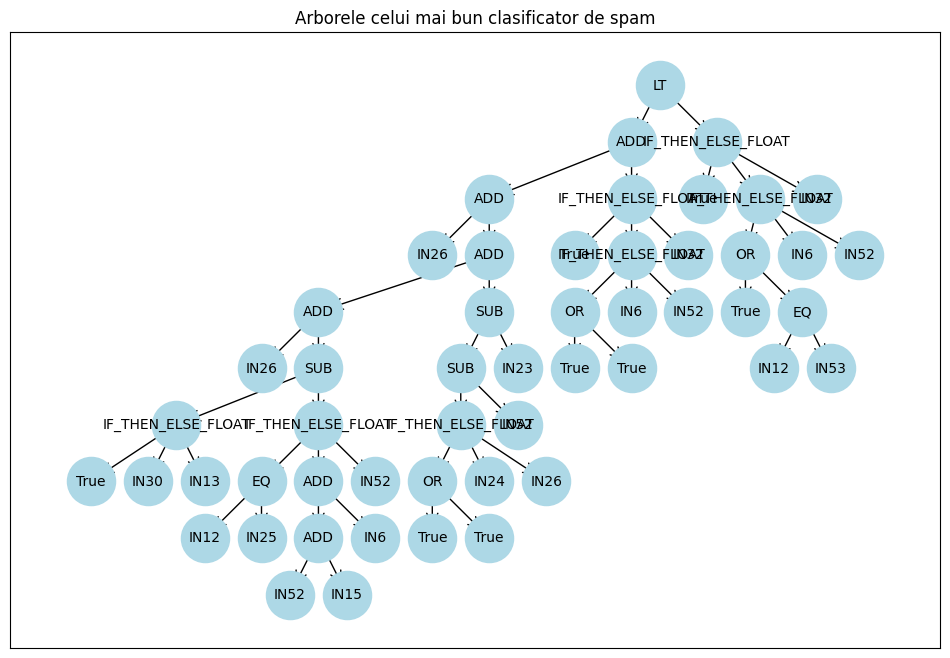

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
# networkx.drawing.nx_agraph a fost mutat, verificƒÉm calea corectƒÉ
try:
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    print("Aten»õie: networkx.drawing.nx_agraph.graphviz_layout nu a putut fi importat.")
    print("√éncerca»õi: pip install pygraphviz pydot")
    # O alternativƒÉ, dacƒÉ pygraphviz nu func»õioneazƒÉ direct cu nx_agraph
    import pydot
    from networkx.drawing.nx_pydot import graphviz_layout


if len(hof_spam) > 0 and hof_spam[0] is not None :
    expr_spam = hof_spam[0]
    nodes, edges, labels = gp.graph(expr_spam)

    plt.figure(figsize=(12, 8)) # MƒÉrim figura pentru lizibilitate
    g = nx.DiGraph() # Folosim DiGraph pentru a arƒÉta direc»õia (de la rƒÉdƒÉcinƒÉ la frunze)
    g.add_nodes_from(nodes)
    g.add_edges_from(edges)

    # Folosim graphviz_layout pentru o aranjare ierarhicƒÉ "dot"
    try:
        pos = graphviz_layout(g, prog="dot")
    except Exception as e:
        print(f"Eroare la graphviz_layout: {e}. Se folose»ôte un layout alternativ.")
        pos = nx.spring_layout(g) # Un layout "de rezervƒÉ"

    nx.draw_networkx_nodes(g, pos, node_size=1200, node_color='lightblue')
    nx.draw_networkx_edges(g, pos, edgelist=edges, arrows=True, arrowstyle='->', arrowsize=20)
    nx.draw_networkx_labels(g, pos, labels, font_size=10)
    plt.title("Arborele celui mai bun clasificator de spam")
    plt.show()
else:
    print("Nu s-a gƒÉsit un individ √Æn Hall of Fame pentru a fi afi»ôat.")

## 4. Regresie simbolicƒÉ cu DEAP

Problema standard pentru prezentarea GP este **regresia simbolicƒÉ**, unde scopul este sƒÉ deducem o expresie matematicƒÉ (un model) care se potrive»ôte cel mai bine unui set de date (puncte (x, y)).

Importarea componentelor »ôi librƒÉriilor principale:

In [ ]:
import operator
import math
import random
import numpy as np

# Modulele DEAP sunt deja importate mai sus
# from deap import algorithms, base, creator, tools, gp

# Pentru evitarea √ÆmpƒÉr»õirii cu 0, avem nevoie din nou operatorul `protectedDiv`.

# Func»õia protectedDiv este deja definitƒÉ mai sus, o putem refolosi.
# def protectedDiv(left, right):
#     try:
#         return left / right
#     except ZeroDivisionError:
#         return 1.0

# definim mul»õimea primitivelor. De data aceasta, vom folosi o mul»õime de primitive **netipizatƒÉ** (`gp.PrimitiveSet`), deoarece toate opera»õiile »ôi intrƒÉrile vor fi numerice (float).
#   "MAIN": Numele mul»õimii.
#   1: NumƒÉrul de argumente (input) ale programului (√Æn acest caz, o singurƒÉ variabilƒÉ `x`).

pset_symb = gp.PrimitiveSet("MAIN", 1, "x") # Am adƒÉugat "x" ca prefix pentru argumentul de intrare

# Operatori binari (cu 2 argumente)
pset_symb.addPrimitive(operator.add, 2, name="add")
pset_symb.addPrimitive(operator.sub, 2, name="sub")
pset_symb.addPrimitive(operator.mul, 2, name="mul")
pset_symb.addPrimitive(protectedDiv, 2, name="pDiv")

# Operatori unari (cu 1 argument)
pset_symb.addPrimitive(operator.neg, 1, name="neg")
pset_symb.addPrimitive(math.cos, 1, name="cos")
pset_symb.addPrimitive(math.sin, 1, name="sin")
# Putem adƒÉuga »ôi al»õi operatori, de ex. sqrt protejat, log protejat
def protectedSqrt(val):
    return math.sqrt(abs(val))
pset_symb.addPrimitive(protectedSqrt, 1, name="pSqrt")

# Constante
# addEphemeralConstant genereazƒÉ o nouƒÉ constantƒÉ (aleatoare √Æn interval) de fiecare datƒÉ c√¢nd este accesatƒÉ
# pentru un nou nod terminal √Æn timpul creƒÉrii arborelui.
pset_symb.addEphemeralConstant("randU", lambda: random.uniform(-5, 5)) # Uniform √Æntre -5 »ôi 5
pset_symb.addEphemeralConstant("randN", lambda: random.normalvariate(0, 1)) # Distribu»õie normalƒÉ

# Terminale fixe (dacƒÉ este necesar)
# pset_symb.addTerminal(1.0, name="one")
# pset_symb.addTerminal(math.pi, name="PI")


# Redenumim argumentul implicit ARG0 √Æn 'x' pentru lizibilitate.
# Acest lucru se face automat dacƒÉ specificƒÉm prefixul la crearea PrimitiveSet,
# dar √Æl putem face »ôi explicit.
# pset_symb.renameArguments(ARG0='x') # Deja fƒÉcut prin prefixul "x"

/usr/local/lib/python3.11/dist-packages/deap/gp.py:257: RuntimeWarning: Ephemeral randU function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
/usr/local/lib/python3.11/dist-packages/deap/gp.py:257: RuntimeWarning: Ephemeral randN function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "


UrmeazƒÉ definirea reprezentƒÉrii (genotipul indivizilor). Vom folosi o reprezentare clasicƒÉ de tip arbore (`gp.PrimitiveTree`). De data aceasta, cƒÉutƒÉm sƒÉ minimizƒÉm eroarea, deci `weights=(-1.0,)`.

In [ ]:
# VerificƒÉm dacƒÉ tipurile existƒÉ deja pentru a evita erori la re-rulare
if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if not hasattr(creator, "IndividualSymb"): # Folosim un nume nou pentru a nu suprascrie celƒÉlalt
    creator.create("IndividualSymb", gp.PrimitiveTree, fitness=creator.FitnessMin, pset=pset_symb)

Func»õia fitness transformƒÉ arborele de sintaxƒÉ codificat de individ √Æntr-o func»õie apelabilƒÉ »ôi evalueazƒÉ eroarea pƒÉtraticƒÉ medie (MSE) a aproximƒÉrii fa»õƒÉ de o func»õie »õintƒÉ.

Definim func»õia »õintƒÉ pe care dorim sƒÉ o aproximƒÉm: `f(x) = x^3 + x^2 + x + 1`.

In [ ]:
def target_func(x):
  return x**3 + x**2 + x + 1
  # Sau o altƒÉ func»õie, de ex:
  # return x**4 - x**3 + x**2/2.0 - x/3.0
  # return np.sin(x**2) * np.cos(x) - 1.0

# Punctele √Æn care vom evalua func»õia (»ôi aproximƒÉrile)
# Folosim numpy pentru a genera punctele mai u»ôor
points_x = np.linspace(-5, 5, 100) # 100 de puncte √Æntre -5 »ôi 5
# CalculƒÉm valorile »õintƒÉ o singurƒÉ datƒÉ
points_y_target = np.array([target_func(x_val) for x_val in points_x])

def evalSymbReg(individual, points_x_eval, points_y_target_eval, toolbox_symb_reg):
    # TransformƒÉ expresia arborelui √Æntr-o func»õie apelabilƒÉ
    try:
        func = toolbox_symb_reg.compile(expr=individual)
    except Exception as e:
        # print(f"Eroare la compilare: {e}, individ: {individual}")
        # ReturnƒÉm o valoare mare de eroare pentru indivizii problematici
        return float('inf'),

    # CalculeazƒÉ eroarea pƒÉtraticƒÉ √Æntre expresia evoluatƒÉ »ôi func»õia realƒÉ (»õintƒÉ)
    try:
        sqerrors = ((func(x) - y_target)**2 for x, y_target in zip(points_x_eval, points_y_target_eval))
        mse = math.fsum(sqerrors) / len(points_x_eval)
    except (OverflowError, ValueError) as e:
        # print(f"Eroare numericƒÉ √Æn evaluare: {e}")
        mse = float('inf') # Penalizare pentru erori numerice (ex. numere prea mari)

    return mse,

# print("Puncte de evaluare x:", points_x[:10])
# print("Valori »õintƒÉ y:", points_y_target[:10])

In [ ]:
# Folosim un nou `Toolbox` pentru specificarea parametrilor metodei GP pentru regresie simbolicƒÉ.

toolbox_symb = base.Toolbox()
toolbox_symb.register("expr", gp.genHalfAndHalf, pset=pset_symb, min_=1, max_=4) # Ad√¢ncime maximƒÉ mai mare
toolbox_symb.register("individual", tools.initIterate, creator.IndividualSymb, toolbox_symb.expr)
toolbox_symb.register("population", tools.initRepeat, list, toolbox_symb.individual)
toolbox_symb.register("compile", gp.compile, pset=pset_symb)

# Setarea func»õiei fitness, folosind partial pentru a pre-completa argumentele care nu se schimbƒÉ
toolbox_symb.register("evaluate", evalSymbReg, points_x_eval=points_x, points_y_target_eval=points_y_target, toolbox_symb_reg=toolbox_symb)

# Setarea operatorilor de varia»õie »ôi selec»õie
toolbox_symb.register("select", tools.selTournament, tournsize=7) # Turneu mai mare
toolbox_symb.register("mate", gp.cxOnePoint)
toolbox_symb.register("expr_mut", gp.genFull, min_=0, max_=2) # Subarbori pentru muta»õie
toolbox_symb.register("mutate", gp.mutUniform, expr=toolbox_symb.expr_mut, pset=pset_symb)

# SetƒÉm limite pentru mƒÉrimea maximƒÉ a arborilor pentru a evita fenomenul de balonare (bloat-ing)
toolbox_symb.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox_symb.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

stats_fit_symb = tools.Statistics(lambda ind: ind.fitness.values)
stats_size_symb = tools.Statistics(len) # Lungimea este numƒÉrul de noduri din arbore

mstats_symb = tools.MultiStatistics(fitness=stats_fit_symb, size=stats_size_symb)
mstats_symb.register("avg", np.mean)
mstats_symb.register("std", np.std)
mstats_symb.register("min", np.min)
mstats_symb.register("max", np.max)

√én final, urmeazƒÉ rularea metodei GP pentru problema de regresie simbolicƒÉ.

In [ ]:
def main_symb_reg():
    random.seed(21) # Alt seed
    pop_symb = toolbox_symb.population(n=500) # Popula»õie mai mare
    hof_symb = tools.HallOfFame(5) # PƒÉstrƒÉm primii 5 cei mai buni

    pop_symb, logbook_symb = algorithms.eaSimple(pop_symb, toolbox_symb,
                                                 cxpb=0.8,    # Probabilitate mare de crossover
                                                 mutpb=0.1,   # Probabilitate micƒÉ de muta»õie
                                                 ngen=70,     # Mai multe genera»õii
                                                 stats=mstats_symb,
                                                 halloffame=hof_symb,
                                                 verbose=True)
    return pop_symb, logbook_symb, hof_symb

pop_s, log_s, hof_s = main_symb_reg()


<ipython-input-6-0dfc3b64c67e>:10: RuntimeWarning: invalid value encountered in scalar divide
  return left / right
<ipython-input-6-0dfc3b64c67e>:10: RuntimeWarning: divide by zero encountered in scalar divide
  return left / right
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


   	      	                  fitness                  	                      size                     
   	      	-------------------------------------------	-----------------------------------------------
gen	nevals	avg	gen	max	min	nevals	std	avg  	gen	max	min	nevals	std    
0  	500   	nan	0  	nan	nan	500   	nan	5.974	0  	28 	2  	500   	4.35538
1  	399   	inf	1  	inf	874.81	399   	nan	6.61 	1  	30 	1  	399   	4.61453
2  	409   	inf	2  	inf	298.466	409   	nan	8.68 	2  	35 	1  	409   	5.84924
3  	399   	4640.72	3  	298362	160.147	399   	21984.4	9.832	3  	32 	1  	399   	5.26192
4  	409   	24801.2	4  	4.26741e+06	160.147	409   	248683 	10.888	4  	30 	2  	409   	4.65998
5  	415   	inf    	5  	inf        	154.693	415   	nan    	12.428	5  	38 	1  	415   	5.10772
6  	398   	inf    	6  	inf        	79.2669	398   	nan    	12.926	6  	32 	1  	398   	4.88104
7  	409   	91717.8	7  	1.84166e+07	42.7949	409   	942107 	12.596	7  	31 	2  	409   	4.78255
8  	401   	inf    	8  	inf        	13.9837	401   


Cele mai bune solu»õii pentru regresia simbolicƒÉ:
Solu»õia 1 (Fitness MSE: 0.0067):
	add(add(sub(pDiv(add(x0, cos(add(x0, cos(add(x0, cos(add(x0, cos(sub(pDiv(mul(2.0249018975770667, -0.6263812682625741), sub(2.0249018975770667, 2.0249018975770667)), 2.0249018975770667))))))))), 3.934401813453688), neg(pSqrt(mul(pDiv(add(x0, add(sub(pDiv(mul(2.0249018975770667, add(x0, pSqrt(pDiv(-0.6263812682625741, x0)))), add(x0, x0)), 2.0249018975770667), add(x0, cos(add(x0, cos(sub(pDiv(mul(x0, -0.6263812682625741), sub(pDiv(-0.47880389749610314, x0), 2.0249018975770667)), 2.0249018975770667))))))), pDiv(2.0249018975770667, x0)), -0.6263812682625741)))), x0), mul(x0, pDiv(add(x0, x0), pDiv(2.0249018975770667, add(x0, cos(-0.47880389749610314))))))
Solu»õia 2 (Fitness MSE: 0.0068):
	add(add(sub(pDiv(add(x0, cos(add(x0, cos(add(x0, cos(add(x0, cos(cos(-0.47880389749610314))))))))), 3.934401813453688), neg(pSqrt(mul(pDiv(add(x0, add(sub(pDiv(mul(2.0249018975770667, add(x0, pSqrt(pDiv(-0.47880389749

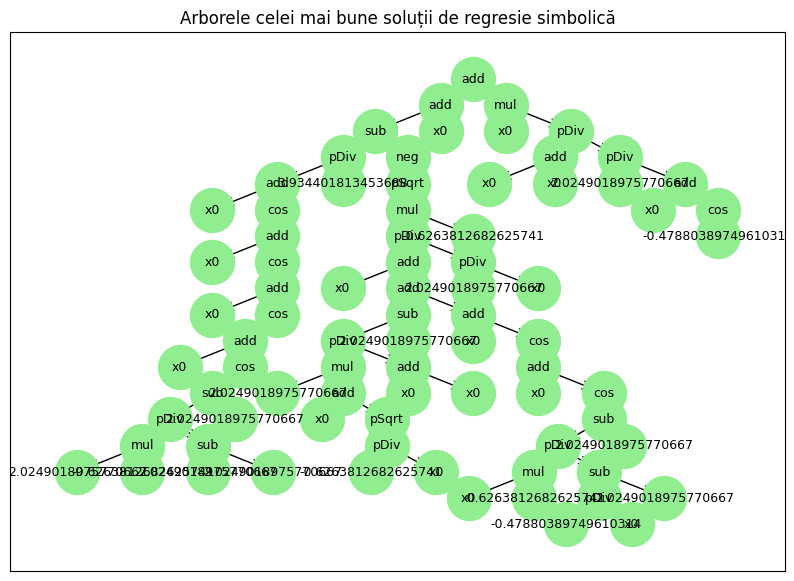

In [ ]:
# Afi»ôarea celor mai bune solu»õii (expresii matematice) gƒÉsite:

print("\nCele mai bune solu»õii pentru regresia simbolicƒÉ:")
if len(hof_s) > 0:
    for i, sol_expr in enumerate(hof_s):
        print(f"Solu»õia {i+1} (Fitness MSE: {sol_expr.fitness.values[0]:.4f}):")
        print(f"\t{sol_expr}")
else:
    print("Nu s-au gƒÉsit solu»õii √Æn Hall of Fame.")

# Putem vizualiza »ôi arborele celei mai bune solu»õii, similar cu exemplul spam
if len(hof_s) > 0 and hof_s[0] is not None:
    best_expr_symb = hof_s[0]
    nodes_s, edges_s, labels_s = gp.graph(best_expr_symb)

    plt.figure(figsize=(10, 7))
    g_s = nx.DiGraph()
    g_s.add_nodes_from(nodes_s)
    g_s.add_edges_from(edges_s)
    try:
        pos_s = graphviz_layout(g_s, prog="dot")
        nx.draw_networkx_nodes(g_s, pos_s, node_size=1000, node_color='lightgreen')
        nx.draw_networkx_edges(g_s, pos_s, edgelist=edges_s, arrows=True, arrowstyle='->', arrowsize=15)
        nx.draw_networkx_labels(g_s, pos_s, labels_s, font_size=9)
        plt.title("Arborele celei mai bune solu»õii de regresie simbolicƒÉ")
        plt.show()
    except Exception as e:
        print(f"Nu s-a putut desena graful pentru regresia simbolicƒÉ: {e}")
        print("Este posibil ca solu»õia sƒÉ fie prea simplƒÉ (ex. doar un terminal).")
        print(f"Solu»õie: {best_expr_symb}")

## 5. Exerci»õii

1.  **Vizualizare graficƒÉ (regresie simbolicƒÉ):**
    *   Vizualiza»õi grafic func»õia `target_func` originalƒÉ.
    *   Pe acela»ôi grafic, suprapune»õi aproximƒÉrile generate de 3-5 solu»õii diferite din `hof_s` (Hall of Fame). Compila»õi fiecare expresie din `hof_s` √Æntr-o func»õie Python folosind `toolbox_symb.compile(expr=sol_expr)` »ôi apoi plota»õi `func(points_x)`. Observa»õi c√¢t de bine se potrivesc.

2.  **Impactul cgomotului (regresie simbolicƒÉ):**
    *   Modifica»õi, perturba»õi datele de training  (`points_y_target`) prin adƒÉugarea unui zgomot gaussian aditiv: `points_y_noisy = points_y_target + numpy.random.normal(0, sigma, len(points_y_target))`, unde `sigma` este devia»õia standard a zgomotului (ex. 0.1, 0.5, 1.0).
    *   Re-rula»õi algoritmul de regresie simbolicƒÉ folosind aceste date zgomotoase.
    *   Cum este afectatƒÉ performan»õa (fitness-ul minim atins) »ôi structura solu»õiilor gƒÉsite de prezen»õa »ôi magnitudinea zgomotului? Compara»õi cu solu»õiile ob»õinute pe date curate.

3.  **Modificarea mul»õimii de primitive (regresie simbolicƒÉ):**
    *   Experimenta»õi cu diferite mul»õimi de primitive √Æn `pset_symb`. De exemplu:
        *   Elimina»õi func»õiile trigonometrice (`sin`, `cos`).
        *   AdƒÉuga»õi alte func»õii matematice (ex. `math.log` protejat, `math.exp` protejat, `x^2`, `x^3` ca primitive).
        *   Modifica»õi intervalul pentru constantele efemere (`randU`).
    *   Cum influen»õeazƒÉ aceste schimbƒÉri capacitatea algoritmului de a gƒÉsi o solu»õie bunƒÉ »ôi complexitatea solu»õiilor?

4.  **Regresie simbolicƒÉ pentru o func»õie 2D:**
    *   Defini»õi o nouƒÉ func»õie »õintƒÉ `target2(x, y)`, de exemplu: `f(x,y) = sin(x) * cos(y) + x*y/2` sau `f(x,y) = x^2 - y^2`.
    *   Genera»õi un set de date de antrenament:
        *   `x_vals = np.linspace(-2, 2, 20)`
        *   `y_vals = np.linspace(-2, 2, 20)`
        *   Crea»õi un grid de puncte `(xv, yv) = np.meshgrid(x_vals, y_vals)`.
        *   Calcula»õi valorile »õintƒÉ `z_target = target2(xv, yv)`. Punctele de antrenament vor fi `(xv.flatten(), yv.flatten(), z_target.flatten())`.
    *   Adapta»õi configura»õia GP:
        *   `pset_symb2D = gp.PrimitiveSet("MAIN", 2, "ARG")` (pentru 2 argumente de intrare, `ARG0` »ôi `ARG1`, sau `x` »ôi `y` dacƒÉ le redenumi»õi). Redenumi»õi argumentele √Æn `x` »ôi `y`.
        *   Modifica»õi func»õia de evaluare `evalSymbReg2D` pentru a lucra cu douƒÉ intrƒÉri »ôi a calcula MSE pe setul de date 2D.
    *   Rula»õi algoritmul »ôi analiza»õi solu»õiile. Pute»õi vizualiza suprafa»õa generatƒÉ de cea mai bunƒÉ solu»õie »ôi compara-o cu suprafa»õa func»õiei `target2` (folosind `plot_surface` din `matplotlib`).


In [ ]:
def target2(x, y):
  return #????? - completa»õi aici cu func»õie 2D

In [ ]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
xv, yv = np.meshgrid(x, y)

In [ ]:
z = target2(xv, yv)
print(z)

[[-1.32544426 -1.4160307  -1.31233904 -1.03451664 -0.63654458 -0.19574909
   0.20222297  0.48004536  0.58373703  0.49315059]
 [-0.89405725 -0.98464368 -0.88095202 -0.60312962 -0.20515756  0.23563792
   0.63360998  0.91143238  1.01512404  0.92453761]
 [-0.46563141 -0.55621784 -0.45252618 -0.17470378  0.22326828  0.66406377
   1.06203582  1.33985822  1.44354988  1.35296345]
 [-0.12341017 -0.2139966  -0.11030494  0.16751746  0.56548952  1.006285
   1.40425706  1.68207946  1.78577112  1.69518469]
 [ 0.06611266 -0.02447378  0.07921788  0.35704028  0.75501234  1.19580783
   1.59377989  1.87160229  1.97529395  1.88470751]
 [ 0.06611266 -0.02447378  0.07921788  0.35704028  0.75501234  1.19580783
   1.59377989  1.87160229  1.97529395  1.88470751]
 [-0.12341017 -0.2139966  -0.11030494  0.16751746  0.56548952  1.006285
   1.40425706  1.68207946  1.78577112  1.69518469]
 [-0.46563141 -0.55621784 -0.45252618 -0.17470378  0.22326828  0.66406377
   1.06203582  1.33985822  1.44354988  1.35296345]
 [-0

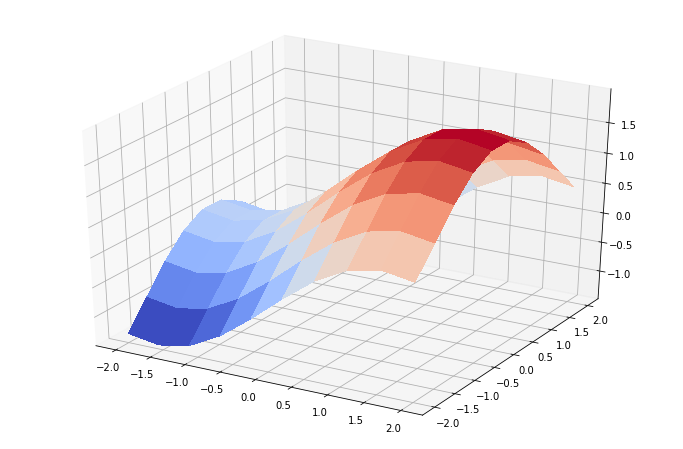

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(xv, yv, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

5.  **Parametrizare**
    *   Experimenta»õi cu diferi»õi parametri ai algoritmului `eaSimple`:
        *   Dimensiunea popula»õiei (`n` √Æn `toolbox.population`).
        *   NumƒÉrul de genera»õii (`ngen`).
        *   ProbabilitƒÉ»õile de √Æncruci»ôare (`cxpb`) »ôi muta»õie (`mutpb`).
        *   Dimensiunea turneului (`tournsize` √Æn `tools.selTournament`).
    *   Observa»õi cum ace»ôti parametri afecteazƒÉ viteza de convergen»õƒÉ, calitatea solu»õiei finale »ôi diversitatea popula»õiei. ExistƒÉ un compromis?


**Observa»õii suplimentare, concluzii**

*   **Interpretabilitatea solu»õiilor:** Un avantaj major al GP (√Æn special pentru regresie simbolicƒÉ) este cƒÉ solu»õiile sunt adesea expresii sau programe care pot fi √Æn»õelese de oameni, spre deosebire de modelele "cutie neagrƒÉ" (ex. re»õele neuronale ad√¢nci).
*   **Cost computa»õional:** GP poate fi foarte costisitoare, deoarece evaluarea fiecƒÉrui individ implicƒÉ executarea unui program. Paralelizarea »ôi tehnicile de e»ôantionare a datelor (subseturi de fitness) sunt adesea necesare pentru probleme complexe.
*   **Domenii de aplicare (inspira»õie proiect):**
    *   **Inginerie:** Proiectarea automatƒÉ a circuitelor, antenelor, structurilor mecanice.
    *   **Finan»õe:** Modele de tranzac»õionare, predic»õia pre»õurilor.
    *   **BioinformaticƒÉ:** Descoperirea de pattern-uri √Æn secven»õe genetice.
    *   **Procesarea imaginilor:** Generarea de filtre, algoritmi de detec»õie a caracteristicilor.
    *   **RoboticƒÉ:** Dezvoltarea de controlere pentru robo»õi.

*   **CƒÉr»õi de referin»õƒÉ:**
    *   "Genetic Programming: An Introduction" »ôi "Genetic Programming II: Automatic Discovery of Reusable Programs" de John R. Koza.
    *   ["A Field Guide to Genetic Programming"](https://github.com/Johnnyboycurtis/genetic-algorithms/blob/master/Field%20Guide%20to%20Genetic%20Programming.pdf) de Riccardo Poli, William B. Langdon, Nicholas F. McPhee.

In [ ]:
#Exe1:

import matplotlib.pyplot as plt
import numpy as np


y_true = [target_func(x) for x in points_x]

plt.figure(figsize=(10, 6))
plt.plot(points_x, y_true, label="Func»õia originalƒÉ", linewidth=2)

num_solutions_to_plot = min(5, len(hof_s))
for i in range(num_solutions_to_plot):
    sol_expr = hof_s[i]
    func_i = toolbox_symb.compile(expr=sol_expr)
    y_pred = [func_i(x) for x in points_x]
    plt.plot(points_x, y_pred, linestyle='--', alpha=0.7, label=f"Aprox. HOF {i+1}")

# 4. Finalizare grafic
plt.title("Regresie simbolicƒÉ: Func»õia originalƒÉ vs solu»õii din Hall of Fame")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


EXE2:

Ca sa evaluam robuste»õea algoritmului de regresie simbolicƒÉ √Æn fa»õa incertitudinii, perturbƒÉm datele de antrenament prin adƒÉugarea unui zgomot gaussian aditiv. Astfel, valorile »õintƒÉ points_y_target sunt modificate prin adƒÉugarea de zgomot generat cu numpy.random.normal, cu medie 0 »ôi devia»õie standard sigma. Acest lucru simuleazƒÉ date reale afectate de erori de mƒÉsurare. Algoritmul este apoi rulat pe aceste date perturbate, »ôi evaluƒÉm cum se modificƒÉ performan»õa sa (fitness minim atins), precum »ôi forma expresiilor rezultate. Prin compararea cu solu»õiile ob»õinute pe datele curate, putem √Æn»õelege c√¢t de bine generalizeazƒÉ algoritmul »ôi c√¢t de sensibil este la zgomot.

In [ ]:
import numpy as np

sigma = 0.5  # po»õi testa »ôi 0.1, 1.0 etc.
points_y_noisy = points_y_target + np.random.normal(0, sigma, len(points_y_target))

def noisy_eval(individual):
    func = toolbox_symb.compile(expr=individual)
    predictions = [func(x) for x in points_x]
    error = sum((y_pred - y_true)**2 for y_pred, y_true in zip(predictions, points_y_noisy))
    return error,

toolbox_symb.register("evaluate", noisy_eval)

pop = toolbox_symb.population(n=300)
hof_s_noisy = tools.HallOfFame(5)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)

pop, logbook = algorithms.eaSimple(pop, toolbox_symb,
                                    cxpb=0.5, mutpb=0.2,
                                    ngen=40, stats=stats,
                                    halloffame=hof_s_noisy, verbose=False)

# Rezultate
best_noisy = hof_s_noisy[0]
best_error = noisy_eval(best_noisy)[0]

print("Cea mai bunƒÉ solu»õie (cu zgomot):", best_noisy)
print("Eroare totalƒÉ pe date zgomotoase:", best_error)


exe3:

Un element esen»õial al regresiei simbolice este mul»õimea de primitive (pset_symb), adicƒÉ func»õiile »ôi operatorii disponibili √Æn timpul evolu»õiei expresiilor matematice. Prin modificarea acestei mul»õimi, putem controla expresivitatea »ôi complexitatea solu»õiilor generate. √én acest exerci»õiu, vom experimenta √Æn trei direc»õii: (1) eliminarea func»õiilor trigonometrice (sin, cos), (2) adƒÉugarea unor func»õii matematice suplimentare (de exemplu log, exp, ridicƒÉri la pƒÉtrat sau cub), »ôi (3) modificarea intervalului constantelor efemere (ephemeral constants) generate prin randU. ObservƒÉm cum aceste schimbƒÉri afecteazƒÉ capacitatea algoritmului de a descoperi o solu»õie precisƒÉ »ôi/sau simplƒÉ.

In [ ]:
import operator
import math
from deap import gp

def protected_div(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

def protected_log(x):
    return math.log(abs(x) + 1e-6)

def protected_exp(x):
    try:
        return math.exp(min(x, 100))
    except OverflowError:
        return 1e6

pset_symb = gp.PrimitiveSet("MAIN", 1)

pset_symb.addPrimitive(operator.add, 2)
pset_symb.addPrimitive(operator.sub, 2)
pset_symb.addPrimitive(operator.mul, 2)
pset_symb.addPrimitive(protected_div, 2)
pset_symb.addPrimitive(protected_log, 1)
pset_symb.addPrimitive(protected_exp, 1)
pset_symb.addPrimitive(lambda x: x**2, 1)
pset_symb.addPrimitive(lambda x: x**3, 1)

pset_symb.addEphemeralConstant("randU", lambda: random.uniform(-2, 2))

pset_symb.renameArguments(ARG0='x')


exe4:

Extindem regresia simbolicƒÉ pentru a aproxima o func»õie cu douƒÉ variabile de intrare, cum ar fi
ùëì
(
ùë•
,
ùë¶
)
=
sin
‚Å°
(
ùë•
)
‚ãÖ
cos
‚Å°
(
ùë¶
)
+
1
2
ùë•
ùë¶
f(x,y)=sin(x)‚ãÖcos(y)+
2
1
‚Äã
 xy. Vom genera o grilƒÉ de puncte
(
ùë•
,
ùë¶
)
(x,y) √Æn spa»õiul bidimensional, vom evalua func»õia »õintƒÉ √Æn aceste puncte »ôi vom adapta configura»õia GP (Genetic Programming) pentru a lucra cu douƒÉ argumente. Func»õia de fitness va calcula eroarea medie pƒÉtraticƒÉ (MSE) pe tot setul de date. La final, vom putea vizualiza suprafa»õa generatƒÉ de cea mai bunƒÉ solu»õie, compar√¢nd-o cu func»õia originalƒÉ folosind plot_surface din matplotlib.



In [ ]:
import numpy as np
import operator, math, random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import base, creator, tools, gp, algorithms

def target2(x, y):
    return math.sin(x) * math.cos(y) + 0.5 * x * y

x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(x_vals, y_vals)
train_X = xx.flatten()
train_Y = yy.flatten()
train_Z = np.array([target2(x, y) for x, y in zip(train_X, train_Y)])

pset_symb2D = gp.PrimitiveSet("MAIN", 2)
pset_symb2D.renameArguments(ARG0='x')
pset_symb2D.renameArguments(ARG1='y')

pset_symb2D.addPrimitive(operator.add, 2)
pset_symb2D.addPrimitive(operator.sub, 2)
pset_symb2D.addPrimitive(operator.mul, 2)
pset_symb2D.addPrimitive(lambda x, y: x if y == 0 else x / y, 2)
pset_symb2D.addPrimitive(math.sin, 1)
pset_symb2D.addPrimitive(math.cos, 1)
pset_symb2D.addEphemeralConstant("rand", lambda: random.uniform(-1, 1))

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset_symb2D, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("compile", gp.compile, pset=pset_symb2D)

def evalSymbReg2D(individual):
    func = toolbox.compile(expr=individual)
    preds = np.array([func(x, y) for x, y in zip(train_X, train_Y)])
    return ((preds - train_Z) ** 2).mean(),

toolbox.register("evaluate", evalSymbReg2D)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr, pset=pset_symb2D)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

pop, logbook = algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40,
                                   stats=stats, halloffame=hof, verbose=False)

best_func = toolbox.compile(expr=hof[0])
Z_pred = np.array([best_func(x, y) for x, y in zip(train_X, train_Y)])
Z_pred = Z_pred.reshape(xx.shape)
Z_true = train_Z.reshape(xx.shape)

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xx, yy, Z_true, cmap='viridis')
ax1.set_title("Func»õia originalƒÉ")

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, Z_pred, cmap='plasma')
ax2.set_title("Aproximare simbolicƒÉ")

plt.show()
